# Практическая работа №3: Регрессионный анализ
Выполнил студент гр. 1374 Москвин Сергей. Вариант №14

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
Регрессионная модель: 
$\mathbb{E}_{\theta}(Y|z)=f_{\theta}(z)$  
$Y$ - наблюдения  
$z$ - ковариата

Линейная регрессионная модель:
$\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta$  
$\beta$ - вектор параметров  
$x(z)$ - вектор регрессоров

Альтернативная форма записи модели линейной регрессии:  
$Y=X^\intercal\beta + \epsilon$  
$\epsilon$ - вектор ошибок   

Метод наименьщих квадратов(МНК):  
$RSS(\beta)=\left\| Y-X^{\intercal}\beta \right\|=(Y-X^{\intercal}\beta)^{\intercal}\cdot(Y-X^{\intercal}\beta)\to min_\beta$

Нормальные уравнения:  
$XX^{\intercal}\beta = XY$  

Решение системы нормальных уравнений в регулярном случае:  
$\hat{\beta}=(XX^{\intercal})^{-1}XY$  

Несмещённая оценка дисперсии:  
$s^2 = \frac{SS_e}{n-r} = \frac{RSS(\hat{\beta})}{n-r}$  
$r$-ранг матрицы X  

Дно функции:  
$\psi(\beta)=C^{\intercal}\beta$

Предположения:  
Классическое предположение:  
$Y\sim\mathcal{N}(X^\intercal\beta,\sigma^2E)$  
Эквивалентное предположение об остатках:  
$\varepsilon \sim \mathcal{N}(0,\sigma^2E)$ 

Доверительный интервал:  
ДНО функции:  
$\psi=C^{\intercal}\beta$  
МНК-оценка:  
$\widehat{\psi}=C^{\intercal}\beta$  
Элемент дисперсии оценки:  
$b_{\psi}=C^{\intercal}(XX^{\intercal})^{-1}C$  
Распределение  
$\widehat{\psi}\sim \mathcal{N}(\psi,\sigma^{2}b)$  

$\frac{\widehat{\psi}-\psi}{s\sqrt{b}}\sim \mathcal{S}_{n-r}$

Доверительный интервал уровня доверия $1-\alpha$:  
$\left[ \widehat{\psi} - x_{\alpha}s\sqrt{b};\widehat{\psi} + x_{\alpha}s\sqrt{b} \right]$  
$x_{\alpha}: \mathcal{S}_{n-r}(X_{\alpha})=1-\frac{\alpha}{2}$

Доверительный эллипсоид:  
$b_\psi = C^\intercal(XX^\intercal)^{-1}C$  
Распределение:  
$\frac{\left(\hat{\psi} - {\psi}\right)^\intercal {b_\psi}^{-1} \left(\hat{\psi} - {\psi}\right)}{qS^2} \sim \mathcal{F}_{q,n-r}$  
Доверительный эллипсоид:    
$\left\{\overrightarrow{x} : \left(\overrightarrow{x} - \hat{\psi}\right)^\intercal b_\psi^{-1} \left(\overrightarrow{x} - \hat{\psi}\right) \le q S^2 x_\alpha\right\}$  
$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

Проверка гипотез:  
Основная гипотеза $H_0:\psi=0$   
Статистика:  
$\mathbb{F} = \frac{SS_H/q}{SS_e/(n-r)}$  
$SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$  
$\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы  
$\mathbb{F} \sim \mathcal{F}_{q,n-r}$  
$x_\alpha: \mathcal{F}_{q, n-r}(x_\alpha) = 1 - \alpha$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### 1.Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной $Y$ по переменной $X$. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

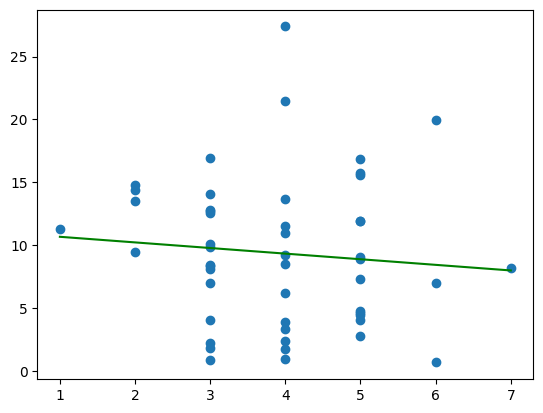

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats 
#входные данные 
Y = np.array([6.19, 11.32, 0.68, 12.82, 9.26, 9.89, 4.08, 4.60, 7.30, 0.85, 2.77, 11.93, 8.91, 6.97, 8.21, 14.08, 0.97, 8.13, 13.48, 11.93, 4.79, 3.33, 10.07, 14.39, 2.41, 12.69, 14.76, 16.89, 2.20, 4.44, 8.47, 8.44, 11.00, 12.60, 1.75, 8.32, 9.49, 1.85, 15.57, 19.93, 16.95, 13.64, 6.96, 3.87, 9.10, 21.48, 27.39, 4.07, 15.71, 11.51])
X = np.array([4, 1, 6, 3, 4, 3, 5, 5, 5, 3, 5, 5, 5, 3, 7, 3, 4, 3, 2, 5, 5, 4, 3, 2, 4, 3, 2, 5, 3, 5, 4, 3, 4, 3, 4, 3, 2, 3, 5, 6, 3, 4, 6, 4, 5, 4, 4, 3, 5, 4])
alpha = 0.1
h = 3.10
plt.scatter(X,Y) #график результатов эксперемента  

#построение МНК
X_2 = np.array([np.ones(len(X)), X])
inv_XX = np.linalg.inv(np.matmul(X_2,X_2.T))
b = np.matmul(np.matmul(inv_XX, X_2), Y) 

temp = list(set(X))
values = []
for i in temp:
    values.append(b[0]+b[1]*i)

plt.plot(temp,values,color='g')#построение линии регрессии 
plt.show()

Модель линейной регрессии не подходит для имеющихся данных

### 2.Построить и интерпретировать несмещённую оценку дисперсии. На базе ошибок построить гистограмму с шагом h. Проверить гипотезу нормальности ошибок на уровне значимости $\alpha $ по $\chi^{2}$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещённая оценка дисперсии =33.961747023163234
Реальные частоты:  [9, 8, 13, 9, 11]
Ожидаемые частоты:  [4.792843169870801, 8.059386896696562, 10.279401710655737, 9.94512881669014, 13.75810149701035]
Статистика хи-квадрат:  5.056265626548612
x_alpha: 6.251388631170325
Принимаем гипотезу
Статистика Колмогорова: 0.34974134760407544
x_alpha: 0.17307822563424255
Оценка не соответствует нормальному распределению.


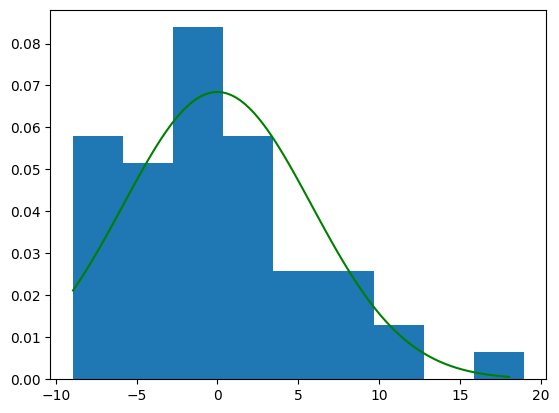

In [45]:
s2 = np.sum((Y - np.matmul(X_2.T,b))**2)/(len(X) - np.linalg.matrix_rank(X_2))
print(f"Несмещённая оценка дисперсии ={s2}")
mis = Y - np.matmul(X_2.T,b) # вычисление ошибок
bins = np.arange(min(mis), max(mis) + h, h)
plt.hist(mis, bins=bins,density= True) #гистограмма ошибок
intervals = [[bins[0],bins[1]],[bins[1],bins[2]],[bins[2],bins[3]],[bins[3],bins[4]],[bins[i] for i in range(4,10)]]
real_fr = []
theor_fr = []
def Count_frec(a,b,c,fr):#рассчёт реальных частот 
    counter = 0
    for i in c:
        if (i>=a) and (i<b):
            counter+=1
    fr.append(counter)
def Exp_frec(a,b,i,fr):#рассчёт гипотетических частот 
    counter = 0
    counter = len(mis)*(stats.norm.cdf(intervals[i][-1],0,np.sqrt(s2))-stats.norm.cdf(intervals[i][0],0,np.sqrt(s2)))
    fr.append(counter)
for i in range(len(intervals)):
    Count_frec(intervals[i][0],intervals[i][-1],mis,real_fr)
    Exp_frec(intervals[i][0],intervals[i][-1],i,theor_fr)

print('Реальные частоты: ',real_fr)
print('Ожидаемые частоты: ',theor_fr)

for_chi = []
for i in range(len(real_fr)):
    number = (real_fr[i]-theor_fr[i])**2 / theor_fr[i]
    for_chi.append(number)
chi_square = np.sum(for_chi)
print("Статистика хи-квадрат: ", chi_square)
x_alpha_1 = stats.chi2.ppf(1 - alpha, df = len(real_fr) - 2)
print("x_alpha:", x_alpha_1)
if chi_square > x_alpha_1:
    result = "Отвергаем гипотезу"
else:
    result = "Принимаем гипотезу"
print(result)

#Нахождение статистики критерия Колмогорова  
ks, _ = stats.kstest(mis, 'norm')
print("Статистика Колмогорова:", ks)
x_alpha_0 = stats.kstwobign.ppf(1 - alpha) / np.sqrt(len(mis))
print("x_alpha:", x_alpha_0)
if x_alpha_0 < ks:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")

#визуализация
x_for_visual = np.linspace(min(mis), max(mis), 100)
def y1(x,d):
    return stats.norm.pdf(x,0, np.sqrt(d))
y_for_visual = y1(x_for_visual,s2)    
plt.plot(x_for_visual, y_for_visual,color='g') 
plt.show()

### 3.В предположении нормальности ошибок построить доверительный интервал для параметров $\beta_0,\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня доверия $1-\alpha$ для ($\beta_0,\beta_1$) (вычислить его полуоси).

Доверительный интервал уровня доверия $1-\alpha$ имеет вид:  
$\left[ \widehat{\psi} - x_{\alpha}s\sqrt{b};\widehat{\psi} + x_{\alpha}s\sqrt{b} \right]$  
$x_{\alpha}: \mathcal{S}_{n-r}(x_{\alpha})=1-\frac{\alpha}{2}$

In [46]:
c = np.array([1 , 0])
x_a = stats.t.ppf(1 - alpha/2, df = len(X) - np.linalg.matrix_rank(X_2))
b_psi = np.matmul(np.matmul(c.T, inv_XX), c)
left = b[0]-x_a * np.sqrt(s2)*np.sqrt(b_psi)
right = b[0]+x_a * np.sqrt(s2)*np.sqrt(b_psi)
print(f'[{left},{right}]')

[6.444451627057873,15.790162922344948]


$\left[6.444, 15.790\right] \ni \beta_0$

In [47]:
c = np.array([0 , 1])
x_a = stats.t.ppf(1 - alpha/2, df = len(X) - np.linalg.matrix_rank(X_2))
b_psi = np.matmul(np.matmul(c.T, inv_XX), c)
left = b[1]-x_a * np.sqrt(s2)*np.sqrt(b_psi)
right = b[1]+x_a * np.sqrt(s2)*np.sqrt(b_psi)
print(f'[{left},{right}]')

[-1.584753020474606,0.6926574721575617]


$\left[-1.585, 0.693\right] \ni \beta_1$

In [48]:
C = np.eye(2)
B = np.matmul(C.T, inv_XX)
B = np.matmul(B,C)
B_inv = np.linalg.inv(B)
q = len(b)
x_alpha = stats.f.ppf(1-alpha, dfn=2, dfd=len(X) - np.linalg.matrix_rank(X_2))
eigenvalues, _ = np.linalg.eig(B_inv)
semi_axes = np.sqrt(1 / eigenvalues * (x_alpha * q * s2))
print(f'Доверительный эллипс имеет следующие полуоси : {semi_axes[0]} и {semi_axes[1]}')

Доверительный эллипс имеет следующие полуоси : 6.289671225272528 и 0.4299795853926564


### 4.Сформулировать гипотезу независимой переменной Y от переменной X. Провести проверку зависимости.

Основная гипотеза: $H_0 : \psi = 0$

In [49]:
b_1_h = np.mean(Y)
b_0_h = 0
b_h = np.array([b_0_h,b_1_h]) 
q = 2
RSSbh = np.sum((Y - np.matmul(X_2.T,b_h))**2)
RSSb = np.sum((Y - np.matmul(X_2.T,b))**2)
SS_H = RSSbh - RSSb
F = SS_H / q / s2
x_a = stats.f.ppf(1 - alpha, dfn=q, dfd=len(X) - np.linalg.matrix_rank(X_2))
print(f"Статистика F = {F}")
print(f"x_alpha = {x_a}")
if F > x_a:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Статистика F = 655.4090612153341
x_alpha = 2.416660110053031
Отвергаем нулевую гипотезу


### 5.Сформулировать модель включающую доплнительный член с $X^2$.Построить МНК оценки параметров $\beta_0,\beta_1,\beta_2$ в данной модели. Изобразить графически полученную регрессионную модель.

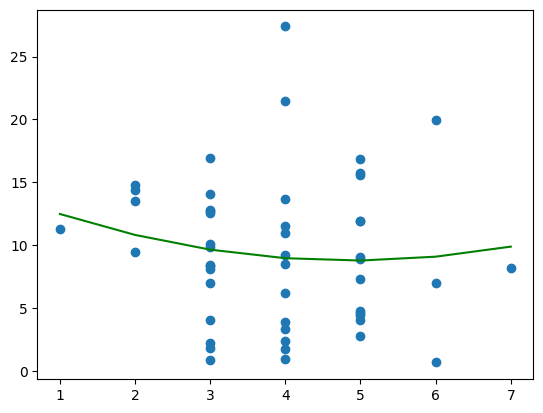

In [50]:
X_3 = np.array([np.ones(len(X)), X, np.square(X)])
inv_XX2 = np.linalg.inv(np.dot(X_3, X_3.T))
b_2 = np.dot(np.dot(inv_XX2, X_3), Y)
plt.scatter(X, Y)
values_2 = []
for i in temp:
    values_2.append(b_2[0]+b_2[1]*i+b_2[2]*i**2)
plt.plot(temp,values_2,color='g')
plt.show()

### 6.Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в пункте 2.

Несмещённая оценка дисперсии = 34.436016267284394
Реальные частоты:  [8, 9, 14, 12, 7]
Ожидаемые частоты:  [4.792843169870801, 8.059386896696562, 10.279401710655737, 9.94512881669014, 13.75810149701035]
Статистика хи-квадрат:  7.346743418663172
x_alpha_2 равен: 6.251388631170325
Отвергаем гипотезу
Статистика Колмогорова: 0.3778389061436861
x_alpha: 0.17307822563424255
Оценка не соответствует нормальному распределению.


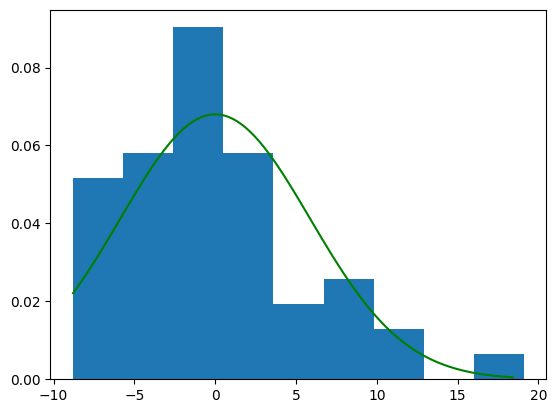

In [51]:
s2_2 = np.sum((Y - np.matmul(X_3.T,b_2))**2)/(len(X) - np.linalg.matrix_rank(X_3))
print("Несмещённая оценка дисперсии =", s2_2)
mis_2 = Y - np.matmul(X_3.T,b_2)#ошибки 
bins_2 = np.arange(min(mis_2), max(mis_2) + h, h)
plt.hist(mis_2, bins=bins_2,density= True)#гистограмма ошибок
intervals_2 = [[bins_2[0],bins_2[1]],[bins_2[1],bins_2[2]],[bins_2[2],bins_2[3]],[bins_2[3],bins_2[4],bins_2[5]],[bins_2[i] for i in range(5,10)]]
real_fr_2 = []
theor_fr_2 = []
def Count_frec(a,b,c,fr):
    counter = 0
    for i in c:
        if (i>=a) and (i<b):
            counter+=1
    fr.append(counter)
def Exp_frec(a,b,i,fr):
    counter = 0
    counter = len(mis)*(stats.norm.cdf(intervals[i][-1],0,np.sqrt(s2))-stats.norm.cdf(intervals[i][0],0,np.sqrt(s2)))
    fr.append(counter)
for i in range(len(intervals_2)):
    Count_frec(intervals_2[i][0],intervals_2[i][-1],mis_2,real_fr_2)
    Exp_frec(intervals_2[i][0],intervals_2[i][-1],i,theor_fr_2)

print('Реальные частоты: ',real_fr_2)
print('Ожидаемые частоты: ',theor_fr_2)

for_chi_2 = []
for i in range(len(real_fr_2)):
    number = (real_fr_2[i]-theor_fr_2[i])**2 / theor_fr_2[i]
    for_chi_2.append(number)
chi_square_2 = np.sum(for_chi_2)
print("Статистика хи-квадрат: ", chi_square_2)

x_alpha_2 = stats.chi2.ppf(1 - alpha, df = len(real_fr_2) - 2)
print("x_alpha_2 равен:", x_alpha_2)
if chi_square_2 > x_alpha_2:
    result = "Отвергаем гипотезу"
else:
    result = "Принимаем гипотезу"
print(result)    

ks, _ = stats.kstest(mis_2, 'norm')
print("Статистика Колмогорова:", ks)
x_alpha_0 = stats.kstwobign.ppf(1 - alpha) / np.sqrt(len(mis))
print("x_alpha:", x_alpha_0)
if x_alpha_0 < ks:
    print("Оценка не соответствует нормальному распределению.")
else:
    print("Оценка соответствует нормальному распределению.")

x_for_visual_2 = np.linspace(min(mis_2), max(mis_2), 100)
y_for_visual_2 = y1(x_for_visual_2 ,s2_2)    
plt.plot(x_for_visual_2, y_for_visual_2,color='g') 
plt.show()

### 7.В предположении нормальности ошибок построить доверительные интервалы для параметров $\beta_0,\beta_1,\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительного эллипсоида уровня доверия $1-\alpha$.

Доверительный интервал уровня доверия $1-\alpha$ имеет вид:  
$\left[ \widehat{\psi} - x_{\alpha}s\sqrt{b};\widehat{\psi} + x_{\alpha}s\sqrt{b} \right]$  
$x_{\alpha}: \mathcal{S}_{n-r}(x_{\alpha})=1-\frac{\alpha}{2}$

In [52]:
c = np.array([1 , 0, 0])
x_a = stats.t.ppf(1 - alpha/2, df = len(X) - np.linalg.matrix_rank(X_3))
b_psi = np.matmul(np.matmul(c.T, inv_XX2), c)
left = b_2[0]-x_a * np.sqrt(s2_2)*np.sqrt(b_psi)
right = b_2[0]+x_a * np.sqrt(s2_2)*np.sqrt(b_psi)
print(f'[{left},{right}]')

[3.4465308454925374,25.836199661775076]


$\left[3.447, 25.836\right] \ni \beta_0$

In [53]:
c = np.array([0 , 1, 0])
x_a = stats.t.ppf(1 - alpha/2, df = len(X) - np.linalg.matrix_rank(X_3))
b_psi = np.matmul(np.matmul(c.T, inv_XX2), c)
left = b_2[1]-x_a * np.sqrt(s2_2)*np.sqrt(b_psi)
right = b_2[1]+x_a * np.sqrt(s2_2)*np.sqrt(b_psi)
print(f'[{left},{right}]')

[-8.160704031308052,3.3537018965111507]


$\left[-8.161, 3.354\right] \ni \beta_1$

In [54]:
c = np.array([0 , 0, 1])
x_a = stats.t.ppf(1 - alpha/2, df = len(X) - np.linalg.matrix_rank(X_3))
b_psi = np.matmul(np.matmul(c.T, inv_XX2), c)
left = b_2[2]-x_a * np.sqrt(s2_2)*np.sqrt(b_psi)
right = b_2[2]+x_a * np.sqrt(s2_2)*np.sqrt(b_psi)
print(f'[{left},{right}]')

[-0.4637491184372908,0.9565233382197216]


$\left[-0.464, 0.957\right] \ni \beta_2$

In [55]:
C = np.eye(3)
B = np.matmul(C.T, inv_XX2)
B = np.matmul(B,C)
B_inv = np.linalg.inv(B)
q = len(b_2)
x_alpha = stats.f.ppf(1-alpha, dfn=3, dfd=len(X) - np.linalg.matrix_rank(X_3))
eigenvalues, _ = np.linalg.eig(B_inv)
semi_axes = np.sqrt(1 / (eigenvalues / (x_alpha * q * s2_2)) )
print(f'Доверительный эллипс имеет следующие полуоси : {semi_axes[0]}, {semi_axes[1]}, {semi_axes[2]}')

Доверительный эллипс имеет следующие полуоси : 0.10709034072090569, 19.220612621784035, 1.983615171201907


### 8.Сформулировать гипотезу линейной регрессионной зависимости переменной Y от переменной X и проверить её значимость на уровне $\alpha$.

Основная гипотеза: $H_0 : \psi = 0$

In [56]:
b_0_h = b[0]
b_1_h = b[1]
b_2_h = 0
b_h_2 = np.array([b_0_h,b_1_h,b_2_h])
q = 3
RSSbh = np.sum((Y - np.matmul(X_3.T,b_h_2))**2)
RSSb = np.sum((Y - np.matmul(X_3.T,b_2))**2)
SS_H = RSSbh - RSSb
F = SS_H / q / s2_2
x_a = stats.f.ppf(1 - alpha, dfn=q, dfd=len(X) - np.linalg.matrix_rank(X_3))
print(f"Статистика F = {F}")
print(f"x_alpha = {x_a}")
if F > x_a:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу") 

Статистика F = 0.1129737003537248
x_alpha = 2.2041823911022664
Не отвергаем нулевую гипотезу


## Выводы
В ходе выполнения практической работы были изучены основы метода наименьших квадратов (МНК), который является стандартным методом для оценки параметров в линейной регрессии. Были получены знания о статистических свойствах МНК-оценок, а также о роли МНК в регрессионном анализе.оделей.

В результате работы были сделаны выводы о характере зависимости в данных и о нормальности вектора ошибок. Эти выводыволяют нам лучше понять природу данных и применять соответствующие методы регрессионног анализа.

В целом, выполнение этой практической рабоозволило нам понять и применить основные концепции МНК, доверительных эллипсов и эллипсоидов, а также проверки гипотез в регрессионном анализе.